### Einstein Frontiers - AI Datathon 
# Lidando com arquivos DICOM

In [1]:
# Conectando ao meu google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
## Dados do RSNA Intracranial Hemorrhage Detection

In [4]:
!pip install pydicom

In [5]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import cv2
import os
from tqdm import tqdm_notebook as tqdm
import time

# Agradecimento ao Felipe Kitamura --> 
função DICOM Tag to table

In [6]:
def dcmtag2table(paths, list_of_tags):
    """
    # Create a Pandas DataFrame with the <list_of_tags> DICOM tags
    # from the DICOM files in <folder>
    # Parameters:
    #    folder (str): folder to be recursively walked looking for DICOM files.
    #    list_of_tags (list of strings): list of DICOM tags with no whitespaces.
    # Returns:
    #    df (DataFrame): table of DICOM tags from the files in folder.
    """
    list_of_tags = list_of_tags.copy()
    items = []
    table = []
    filelist = paths
    print("Listing all files...")
    start = time.time()
    for _f in tqdm(filelist):
        try:
            ds = pydicom.dcmread(_f, stop_before_pixels=True)
            items = []
            items.append(_f)

            for _tag in list_of_tags:
                if _tag in ds:
                    items.append(ds.data_element(_tag).value)
                else:
                    items.append("Not found")

            table.append((items))
        except:
            print("Skipping non-DICOM: " + _f)

            
    list_of_tags.insert(0, "Filename")
    test = list(map(list, zip(*table)))
    dictone = {}

    for i, _tag in enumerate (list_of_tags):
        dictone[_tag] = test[i]

    df = pd.DataFrame(dictone)
    time.sleep(2)
    print("Finished.")
    return df

In [7]:
lista_dcm_paths  = glob('/content/gdrive/MyDrive/hemorragiaEinsteinFrontiers/*')

In [8]:
lista_dcm_paths

['/content/gdrive/MyDrive/hemorragiaEinsteinFrontiers/ID_000012eaf.dcm',
 '/content/gdrive/MyDrive/hemorragiaEinsteinFrontiers/ID_000039fa0.dcm',
 '/content/gdrive/MyDrive/hemorragiaEinsteinFrontiers/ID_00027c277.dcm',
 '/content/gdrive/MyDrive/hemorragiaEinsteinFrontiers/ID_0002a38ad.dcm']

In [9]:
list_of_tags = ['PatientID','StudyInstanceUID','SeriesInstanceUID', 'SOPInstanceUID',
                'HighBit']

In [10]:
df = dcmtag2table(lista_dcm_paths, list_of_tags)

Listing all files...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/4 [00:00<?, ?it/s]

Finished.


In [11]:
df

,Filename,PatientID,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,HighBit
0,/content/gdrive/MyDrive/hemorragiaEinsteinFron...,ID_f15c0eee,ID_30ea2b02d4,ID_0ab5820b2a,ID_000012eaf,15
1,/content/gdrive/MyDrive/hemorragiaEinsteinFron...,ID_eeaf99e7,ID_134d398b61,ID_5f8484c3e0,ID_000039fa0,15
2,/content/gdrive/MyDrive/hemorragiaEinsteinFron...,ID_134bd130,ID_5e6f368725,ID_99fc6d2b76,ID_00027c277,11
3,/content/gdrive/MyDrive/hemorragiaEinsteinFron...,ID_cd5a85fd,ID_74f2e4ee2b,ID_44cfc8e964,ID_0002a38ad,11


In [12]:
dicom0 = pydicom.dcmread(df.Filename[0])
dicom3 = pydicom.dcmread(df.Filename[3])

In [13]:
dicom0

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 188
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.4267.32.337944818669776895705763408052798539612
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_000012eaf
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_f15c0eee'
(0020, 000d) Study Instance UID                  UI: ID_30ea2b02d4
(0020, 000e) Series Instance UID                 UI: ID_0ab5820b2a
(0020, 0010) Study ID                            SH: '

In [14]:
dicom0.pixel_array.max()

2954

In [16]:
dicom0.pixel_array.shape

(512, 512)

In [17]:
dicom3.pixel_array.max()

2380

In [18]:
dicom3

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 10000000250704
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'RSNA Challenge 2019'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_0002a38ad
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_cd5a85fd'
(0020, 000d) Study Instance UID                  UI: ID_74f2e4ee2b
(0020, 000e) Series Instance UID                 UI: ID_44cfc8e964
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: [-125, -17, 218.299988]
(0020, 0037) Image Orientation (Patient)         DS: [1, 0, 0, 0, 1, 0]
(0028, 0002) Samp

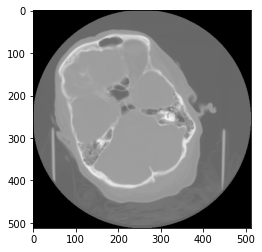

In [22]:
plt.imshow(dicom0.pixel_array, cmap ='gray')

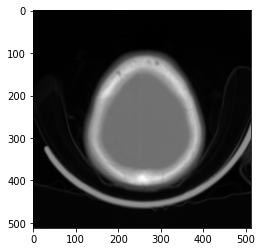

In [23]:
plt.imshow(dicom3.pixel_array, cmap ='gray')

Vocês podem checar mais tags no seguinte link:

https://dicom.innolitics.com/ciods


Tags como Manufacturer, ImageOrientationPatient, ImagePositionPatient, PhotometricInterpretation podem ser interessantes.

# Windowing



*   brain W:80 L:40

*   subdural W:130-300 L:50-100

*   stroke W:8 L:32 or W:40 L:40 3


https://www.kaggle.com/redwankarimsony/ct-scans-dicom-files-windowing-explained

In [24]:
def window_image(img, window_center,window_width, intercept, slope, rescale=True):
    img = (img*slope +intercept) #for translation adjustments given in the dicom file. 
    img_min = window_center - window_width//2 #minimum HU level
    img_max = window_center + window_width//2 #maximum HU level
    img[img<img_min] = img_min #set img_min for all HU levels less than minimum HU level
    img[img>img_max] = img_max #set img_max for all HU levels higher than maximum HU level
    if rescale: 
        img = (img - img_min) / (img_max - img_min)*255.0 
    return img

In [25]:
slope = float(dicom0.RescaleSlope)
intercept = float(dicom0.RescaleIntercept)
img =  dicom0.pixel_array
img_window= window_image(img,50,100, intercept, slope)

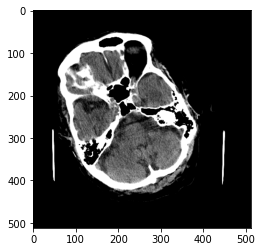

In [26]:
plt.imshow(img_window, cmap ='gray')

In [27]:
img_window.shape

(512, 512)

Nessa competição queremos ver sangramento intra parenquimatos, subdural, etc.

Que tal passarmos a melhor janela para ver cada uma dessas coisa, mas de uma vez só?

janela óssea


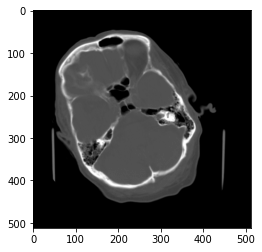

brain


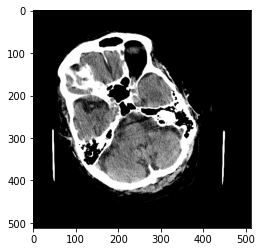

avc


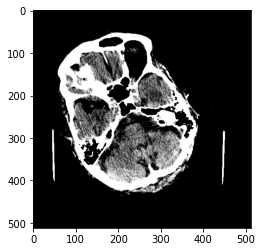

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


stacked


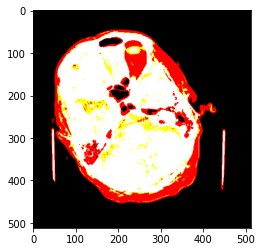

In [28]:
for i in lista_dcm_paths:
    dicom = pydicom.read_file(i)
    slope = float(dicom.RescaleSlope)
    intercept = float(dicom.RescaleIntercept)
    img =  dicom.pixel_array
    img1 = window_image(img,400,2000, intercept, slope)
    img2 = window_image(img,40, 80, intercept, slope)
    img3 = window_image(img,40, 40, intercept, slope)
    array = np.dstack((img1,img2,img3))
    print('janela óssea')
    plt.imshow(img1, cmap = 'gray')
    plt.show()
    print('brain')
    plt.imshow(img2, cmap = 'gray')
    plt.show()
    print('avc')
    plt.imshow(img3, cmap = 'gray')
    plt.show()
    print('stacked')
    plt.imshow(array, cmap = 'gray') # é as oma das iamgens que já vimos! plt.imshow(array[:,:,1], cmap = 'gray')
    plt.show()
    break

Sugestão de material adicional:

Apresentação da SIIM21 do João Santinha com Felipe Kitamura 

Biblioteca SimpleITK 

https://github.com/JoaoSantinha/SIIM21_BIP

Para diferentes exames de imagem, necessitamos de checar Tags diferentes!
Para diferentes tarefas, precisamos janelas diferentes!

Não é tão simples, por isso é importante o trabalho em equipe!

Dúvidas?